### Практическая 2 (Вариант 1)
Уравнение: $(0.2x)^3 = \cos x$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """Функция f(x) = (0.2x)^3 - cos(x) = 0.008*x^3 - cos(x)"""
    return 0.008 * x**3 - math.cos(x)


--- Отделение корней ---


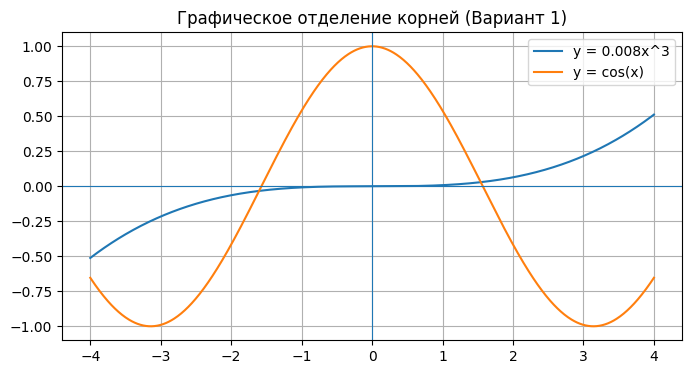

Интервалы со сменой знака (приближённо):
  [-1.7; -1.6]  f(a)=+0.089540, f(b)=-0.003568
  [1.5; 1.6]  f(a)=-0.043737, f(b)=+0.061968

Для дальнейших методов возьмём положительный корень на [1.5; 2.0].


In [3]:
print("--- Отделение корней ---")

# Строим графики y1 = 0.008x^3 и y2 = cos(x)
x = np.linspace(-4, 4, 800)
y1 = 0.008 * x**3
y2 = np.cos(x)

plt.figure(figsize=(8,4))
plt.plot(x, y1, label="y = 0.008x^3")
plt.plot(x, y2, label="y = cos(x)")
plt.axhline(0, linewidth=0.8)
plt.axvline(0, linewidth=0.8)
plt.grid(True)
plt.legend()
plt.title("Графическое отделение корней (Вариант 1)")
plt.show()

# Табличное отделение: ищем смену знака f(x) на сетке
step = 0.1
xs = np.arange(-4, 4+step, step)
intervals = []
for i in range(len(xs)-1):
    a, b = xs[i], xs[i+1]
    fa, fb = f(a), f(b)
    if fa == 0:
        intervals.append((a, a))
    elif fa*fb < 0:
        intervals.append((a, b))

print("Интервалы со сменой знака (приближённо):")
for a,b in intervals:
    if a == b:
        print(f"  x = {a}")
    else:
        print(f"  [{a:.1f}; {b:.1f}]  f(a)={f(a):+.6f}, f(b)={f(b):+.6f}")

print("\nДля дальнейших методов возьмём положительный корень на [1.5; 2.0].")


In [4]:
print("--- Метод половинного деления ---")
a, b, eps, n = 1.5, 2.0, 0.001, 0

print(f"Начальный отрезок: [{a}, {b}]")
print(f"Точность: {eps}\n")

print(" n |    a      |    b      |    c      |   f(c)")
print("-"*55)

while (b - a)/2 > eps:
    n += 1
    c = (a + b)/2
    fc = f(c)
    print(f"{n:2d} | {a:8.6f} | {b:8.6f} | {c:8.6f} | {fc: .6f}")

    if f(a)*fc < 0:
        b = c
    else:
        a = c

x_approx = (a + b)/2
print("-"*55)
print(f"Ответ (биссекция): x ≈ {x_approx:.6f}")
print(f"Проверка: f(x) = {f(x_approx):+.6e}")


--- Метод половинного деления ---
Начальный отрезок: [1.5, 2.0]
Точность: 0.001

 n |    a      |    b      |    c      |   f(c)
-------------------------------------------------------
 1 | 1.500000 | 2.000000 | 1.750000 |  0.221121
 2 | 1.500000 | 1.750000 | 1.625000 |  0.088505
 3 | 1.500000 | 1.625000 | 1.562500 |  0.022221
 4 | 1.500000 | 1.562500 | 1.531250 | -0.010813
 5 | 1.531250 | 1.562500 | 1.546875 |  0.005692
 6 | 1.531250 | 1.546875 | 1.539062 | -0.002564
 7 | 1.539062 | 1.546875 | 1.542969 |  0.001563
 8 | 1.539062 | 1.542969 | 1.541016 | -0.000500
-------------------------------------------------------
Ответ (биссекция): x ≈ 1.541992
Проверка: f(x) = +5.314944e-04


### Практическая 3 (Вариант 1)
Метод итераций

In [5]:
def phi(x):
    """Итерационная формула как в примере: x_{n+1} = x_n - f(x_n)"""
    return x - f(x)

print("--- Метод итераций ---")

eps = 0.001
x0 = 1.75  # середина отрезка [1.5; 2.0]
n = 0

print(f"x0 = {x0}\n")
print(" n |    x_n      |   x_{n+1}   | |x_{n+1}-x_n|")
print("-"*60)

while True:
    x1 = phi(x0)
    n += 1
    diff = abs(x1 - x0)
    print(f"{n:2d} | {x0:10.6f} | {x1:10.6f} | {diff: .6f}")
    if diff < eps:
        break
    x0 = x1

print("-"*60)
print(f"Ответ (итерации): x ≈ {x1:.6f}")
print(f"Проверка: f(x) = {f(x1):+.6e}")


--- Метод итераций ---
x0 = 1.75

 n |    x_n      |   x_{n+1}   | |x_{n+1}-x_n|
------------------------------------------------------------
 1 |   1.750000 |   1.528879 |  0.221121
 2 |   1.528879 |   1.542194 |  0.013315
 3 |   1.542194 |   1.541449 |  0.000745
------------------------------------------------------------
Ответ (итерации): x ≈ 1.541449
Проверка: f(x) = -4.219959e-05


### Практическая 4 (Вариант 1)
Метод хорд и метод касательных (Ньютона)

In [6]:
def f_prime(x):
    """Первая производная f'(x)"""
    return 0.024 * x**2 + math.sin(x)

def f_double_prime(x):
    """Вторая производная f''(x)"""
    return 0.048 * x + math.cos(x)


In [7]:
print("--- Метод хорд ---")
a = 1.5
b = 2.0
eps = 0.001

# Выбор фиксированной точки c (как в учебнике): берём конец, где f(c)*f''(c) > 0
if f(a) * f_double_prime(a) > 0:
    c = a
    x0 = b
else:
    c = b
    x0 = a

print(f"Отрезок: [{a}; {b}]")
print(f"Выбрано: c = {c}, x0 = {x0}\n")

def chord_step(x):
    # x_{n+1} = (c f(x) - x f(c)) / (f(x) - f(c))
    return (c * f(x) - x * f(c)) / (f(x) - f(c))

n = 0
print(" n |    x_n      |   x_{n+1}   | |x_{n+1}-x_n|")
print("-"*60)

while True:
    x1 = chord_step(x0)
    n += 1
    diff = abs(x1 - x0)
    print(f"{n:2d} | {x0:10.6f} | {x1:10.6f} | {diff: .6f}")
    if diff < eps:
        break
    x0 = x1

print("-"*60)
print(f"Ответ (хорды): x ≈ {x1:.6f}")
print(f"Проверка: f(x) = {f(x1):+.6e}")


--- Метод хорд ---
Отрезок: [1.5; 2.0]
Выбрано: c = 2.0, x0 = 1.5

 n |    x_n      |   x_{n+1}   | |x_{n+1}-x_n|
------------------------------------------------------------
 1 |   1.500000 |   1.541743 |  0.041743
 2 |   1.541743 |   1.541487 |  0.000256
------------------------------------------------------------
Ответ (хорды): x ≈ 1.541487
Проверка: f(x) = -2.417038e-06


In [8]:
print("--- Метод касательных (Ньютона) ---")

a, b = 1.5, 2.0
eps = 0.001

# Выбор начального приближения x0: f(x0)*f''(x0) > 0
if f(a) * f_double_prime(a) > 0:
    x0 = a
else:
    x0 = b

print(f"Отрезок: [{a}; {b}]")
print(f"Начальное x0 = {x0}\n")

# Оценка m = min|f'(x)| на отрезке (для проверки |f(x)|/m < eps)
xs = np.linspace(a, b, 2000)
m = float(np.min(np.abs([f_prime(x) for x in xs])))
print(f"m = min|f'(x)| на [{a};{b}] ≈ {m:.6f}\n")

n = 0
print(" n |    x_n      |    f(x_n)    |   x_{n+1}   | |f(x_{n+1})|/m")
print("-"*78)
while True:
    x1 = x0 - f(x0)/f_prime(x0)
    n += 1
    crit = abs(f(x1))/m
    print(f"{n:2d} | {x0:10.6f} | {f(x0): .6e} | {x1:10.6f} | {crit: .6e}")
    if crit < eps:
        break
    x0 = x1

print("-"*78)
print(f"Ответ (Ньютон): x ≈ {x1:.6f}")
print(f"Проверка: f(x) = {f(x1):+.6e}")


--- Метод касательных (Ньютона) ---
Отрезок: [1.5; 2.0]
Начальное x0 = 2.0

m = min|f'(x)| на [1.5;2.0] ≈ 1.005297

 n |    x_n      |    f(x_n)    |   x_{n+1}   | |f(x_{n+1})|/m
------------------------------------------------------------------------------
 1 |   2.000000 |  4.801468e-01 |   1.522383 |  2.006102e-02
 2 |   1.522383 | -2.016729e-02 |   1.541509 |  2.099631e-05
------------------------------------------------------------------------------
Ответ (Ньютон): x ≈ 1.541509
Проверка: f(x) = +2.110753e-05
